<a href="https://colab.research.google.com/github/Ismail-Z97/Spotify_Recommendation_System/blob/child1/SpotifyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1 :** Reading Data

Importing all the Datasets needed for this Project for Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Using the Pandas Library to import the csv files of the datasets in their resceptive dataframe

In [ ]:
import pandas as pd

In [ ]:
data           = pd.read_csv('/content/drive/My Drive/SpotifyProjectDataset/data.csv')
data_by_artist = pd.read_csv('/content/drive/My Drive/SpotifyProjectDataset/data_by_artist.csv')
data_by_genres = pd.read_csv('/content/drive/My Drive/SpotifyProjectDataset/data_by_genres.csv')
data_by_year   = pd.read_csv('/content/drive/My Drive/SpotifyProjectDataset/data_by_year.csv')
data_w_genres  = pd.read_csv('/content/drive/My Drive/SpotifyProjectDataset/data_w_genres.csv')

First Visualization of the first rows of each dataset

In [ ]:
data.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [ ]:
data_by_artist.head(2)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


In [ ]:
data_by_genres.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [ ]:
data_w_genres.head(2)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,NaN,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5,1,9
1,NaN,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5,1,26


In [ ]:
data_by_year.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


Creating a "Decade" column from the "Year" column using the apply function and the lambda function

In [ ]:
data['Decade'] = data['year'].apply(lambda x : str(x)[:3]+"0s")
data[['year','Decade']].tail(5)

,year,Decade
170648,2020,2020s
170649,2020,2020s
170650,2020,2020s
170651,2020,2020s
170652,2020,2020s


# **Phase 2 :** Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

**Visualizing the number of released songs per Decade**

Text(0.5, 1.0, 'Number of Released Songs per Decade')

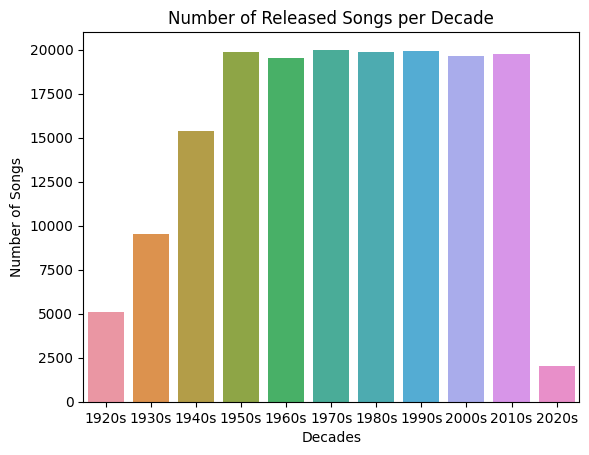

In [ ]:
sns.countplot(data = data, x = data['Decade'])
plt.xlabel("Decades")
plt.ylabel("Number of Songs")
plt.title("Number of Released Songs per Decade")

We can see that music production of songs had a huge spike since the 1920s , and kept reaching the 20000 songs per Decade until a big decline in the 2020s that could be explained by the covid-19 Pendemic .

**Visualizing the Trend of different Features of Music and their change over the Decades**

In [ ]:
avg_values = data.groupby('Decade').mean().reset_index()
px.line(avg_values, x='Decade', y=['acousticness','danceability','energy','instrumentalness','liveness','valence'], title='Trend of various sound features over decades')

<ipython-input-7-ae58daf81a23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_values = data.groupby('Decade').mean().reset_index()


We can observe from our plot that most sound features has stayed relatively stable with minor changes throught the decades , except for acousticness that had a steep decline from the 1950s and the opposite for energy that had great boost in values starting as well from the 1950s , there is also a minor decline throughtout the years for instrumentalness .

**Visualizing the Trend of the Loudness Feature over the Decades**

In [ ]:
avg_loudness = data.groupby('Decade')['loudness'].mean().reset_index()
px.line(avg_loudness, x='Decade', y='loudness', title='Trend of loudness over decades')

The plot show that over the years loudness has become more and more trending in the songs released

**Identifying the top 10 Genres based on Popularity , and plotting the trends of various sound features for these Genres :**

In [ ]:
#Making a copy of the Genres data to work on
df_genres = data_w_genres.copy()

The column genres has multiple values in each row , so we need to give each row a single value of genre to conduct our analysis .

In [ ]:
#First we remove the brackets surrounding the genres
df_genres['genres'] = df_genres['genres'].str.strip('[]')

#Then we split genres by "," to get each genre in each row
df_genres['genres'] = df_genres['genres'].str.split(',')

#Lastly we explode the column genres so that each row has it's 1 genre
df_genres = df_genres.explode('genres')

#We remove any spaces to get uniform values of genre
df_genres['genres'] = df_genres['genres'].str.strip()

The last code will leave empty values for rows that didn't have any genres , the following code will remove these null values .

In [ ]:
# We Replace empty strings ("") in the 'genres' column with NaN
df_genres['genres'].replace("", pd.NA, inplace=True)

# We Drop rows with NaN values in the 'genres' column
df_genres.dropna(subset=['genres'], inplace=True)

# Then we Reset the index
df_genres.reset_index(drop=True, inplace=True)

In [ ]:
# This is a small test for the "pop" genre to see if the genres are coded correctly
pop_genre = df_genres[df_genres['genres'].str.contains('pop', case=False)]
with pd.option_context('display.max_rows', None):
    print(pop_genre['genres'].value_counts().sort_index().head(10))

'acoustic pop'            94
'afghan pop'               7
'afropop'                 43
'albanian pop'             1
'alternative pop rock'    11
'alternative pop'         56
'ambient pop'              4
'antiviral pop'           26
'arab pop'                12
'argentine telepop'        1
Name: genres, dtype: int64


In [ ]:
#Now we use the groupby function to get stats on each genre
df_genres_grp  = df_genres.groupby("genres")['acousticness','danceability','energy','valence','popularity'].mean().reset_index()
df_genres_grp.head()

<ipython-input-24-624e1302c2b0>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,genres,acousticness,danceability,energy,valence,popularity
0,"""australian children's music""",0.443554,0.706205,0.468674,0.746636,43.727273
1,"""black 'n' roll""",0.006651,0.185667,0.912333,0.110567,43.333333
2,"""british children's music""",0.098800,0.906000,0.596000,0.811000,53.000000
3,"""canadian children's music""",0.750819,0.696299,0.256693,0.682129,37.357143
4,"""canzone d'autore""",0.600053,0.479251,0.447950,0.488070,48.536111


In [ ]:
# We create a new DataFrame that contains only the top 10 genres and their features based on popularity
top_10_genres = df_genres_grp.sort_values(by='popularity', ascending=False).head(10)[['genres','popularity','acousticness','danceability','energy','valence']]
top_10_genres

,genres,popularity,acousticness,danceability,energy,valence
251,'basshall',80.666667,0.213167,0.818,0.630167,0.588667
2779,'turkish edm',80.000000,0.008290,0.698,0.719000,0.364000
2755,'trap venezolano',80.000000,0.044600,0.877,0.777000,0.706000
542,'chinese electropop',78.500000,0.002570,0.660,0.787000,0.199000
61,'alberta hip hop',78.500000,0.330000,0.885,0.685000,0.937000
1244,'guaracha',77.000000,0.009030,0.745,0.972000,0.556000
581,'circuit',77.000000,0.009030,0.745,0.972000,0.556000
2384,'russian dance',77.000000,0.005610,0.653,0.945000,0.326000
46,'afro soul',77.000000,0.006270,0.766,0.873000,0.743000
1386,'indie triste',77.000000,0.946000,0.830,0.159000,0.189000


In [ ]:
# Visualization of the Top 10 genres and their features
fig = px.bar(top_10_genres,
             x='genres',
             y=['acousticness','danceability','energy','valence'],
             barmode='group',
             title='Trend of Various Sound Features Over Top 10 Genres')

fig.show()

**Generating a word cloud of the genres present in the dataset using the WordCloud library :**

In [ ]:
from wordcloud import WordCloud

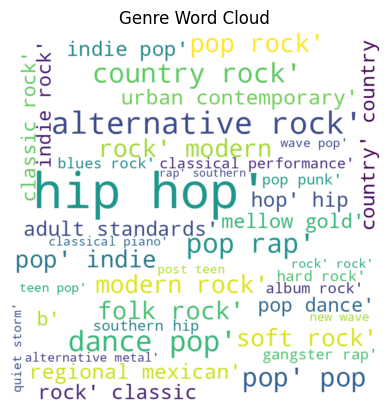

In [ ]:
# Creating a string to use fir the WordCloud that joins all the genres present in the dataset
genre_text = ' '.join(df_genres['genres'])
wordcloud = WordCloud(width=800,
                       height=800,
                       background_color='white',
                       max_words=40,
                       min_font_size=10).generate(genre_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Genre Word Cloud")
plt.show()

**Generating a word cloud of the artists present in the dataset using the WordCloud library :**

To create this word cloud first we need an "artists" column that has a single artist in each row , so we use the same method used for the "genres" column .

In [ ]:
#Creating a copy of the dataset and modifying the artists column
df_artists = data.copy()
df_artists['artists'] = df_artists['artists'].str.strip('[]')
df_artists['artists'] = df_artists['artists'].str.split(',')
df_artists = df_artists.explode('artists')
df_artists['artists'] = df_artists['artists'].str.strip()

In [ ]:
# Removing Nan Values
df_artists['artists'].replace("", pd.NA, inplace=True)
df_artists.dropna(subset=['artists'], inplace=True)
df_artists.reset_index(drop=True, inplace=True)

In [ ]:
#Testing
df_artists.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Decade
0,0.0594,1921,0.982,'Sergei Rachmaninoff',0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
1,0.0594,1921,0.982,'James Levine',0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
2,0.0594,1921,0.982,'Berliner Philharmoniker',0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
3,0.9630,1921,0.732,'Dennis Day',0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s
4,0.0394,1921,0.961,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s


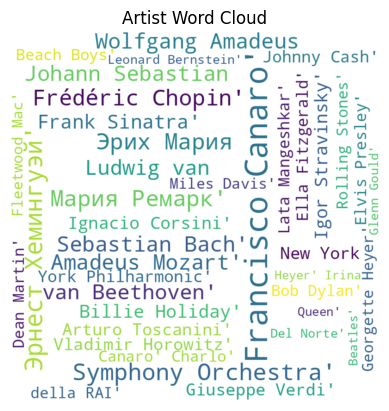

In [ ]:
#Creating the word cloud and plotting it
comment_words = ' '.join(df_artists['artists'])
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color='white',
                      min_word_length=3,
                      max_words=40,
                      min_font_size=10).generate(comment_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Artist Word Cloud")
plt.show()

In [ ]:
# Identifying the top 10 artists with the most songs produced
top10_artists_most_songs = df_artists['artists'].value_counts().head(10)
top10_artists_most_songs = pd.DataFrame({"Artist" : top10_artists_most_songs.index , "Number_Of_Songs" : top10_artists_most_songs.values})
top10_artists_most_songs

,Artist,Number_Of_Songs
0,'Francisco Canaro',2227
1,'Эрнест Хемингуэй',1211
2,'Эрих Мария Ремарк',1068
3,'Frédéric Chopin',1017
4,'Johann Sebastian Bach',925
5,'Wolfgang Amadeus Mozart',921
6,'Ludwig van Beethoven',886
7,'Frank Sinatra',784
8,'Billie Holiday',690
9,'Igor Stravinsky',650


In [ ]:
# Identifying the top 10 artists with the highest popularity score
top10_artists_most_popular = df_artists.groupby('artists')['popularity'].mean().reset_index()
top10_artists_most_popular = top10_artists_most_popular.sort_values('popularity',ascending=False).head(10)
top10_artists_most_popular

,artists,popularity
21059,'Ritt Momney',93.0
14573,'Lele Pons',92.0
15262,'Los Legendarios',90.0
12013,'Jerry Di',89.0
7778,'Emilee',88.0
23737,'Surf Mesa',88.0
28254,'salem ilese',88.0
18944,'Osquel',86.0
26323,'Towy',86.0
16621,'Master KG',86.0


**Conclusion : **
We can conclude that music production has been increasing by a huge rate starting from 1950s ; with acousticness , danceability and valence being the most dominant features in the majority of new released songs in each decade , while hip hop and alternative rock and pop taking the most popularity votes , and artists such as Ritt Momney , Lele Pons and los Legendarios being the most popular but other artists not falling behind by much .